In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'C:\Users\prave\Downloads\file_3_Mar18_Output_1.csv')
df2 = pd.read_csv(r'C:\Users\prave\Downloads\file_4_Mar18_Output_1 (1).csv')
df3 = pd.concat([df1, df2])

In [21]:
#print(df3)
# columns_to_drop = ['timestamp_call_key', 'retailer_code', 'serial', 'account_open_date_13_march', 'account_open_date_18_march']
# df3.drop(columns=columns_to_drop, inplace=True)
print(df3.columns)

Index(['reason', 'mos', 'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_status_13_march', 'card_activation_status_13_march',
       'eservice_ind_13_march', 'ebill_enrolled_status_13_march',
       'auto_pay_enrolled_status_13_march', 'no_of_accounts_with_syf_18_march',
       'account_balance_18_march', 'delinquency_history_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')


C:\Users\prave\AppData\Local\Temp\ipykernel_36860\442250053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col + '_LabelEncoded'] = label_encoder.fit_transform(df_cleaned[col])
C:\Users\prave\AppData\Local\Temp\ipykernel_36860\442250053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col + '_LabelEncoded'] = label_encoder.fit_transform(df_cleaned[col])
C:\Users\prave\AppData\Local\Temp\ipykernel_36860\442250053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

       no_of_accounts_with_syf_13_march account_balance_13_march  \
55                                  2.0                    15.35   
215                                 4.0                     0.28   
235                                 2.0                   756.05   
296                                 5.0                   1146.5   
439                                 1.0                      0.0   
...                                 ...                      ...   
893936                              3.0                      0.0   
894024                              1.0                  1992.93   
894027                              4.0                   485.83   
894047                              4.0                   2935.1   
894163                              8.0                   386.63   

       card_activation_status_13_march  eservice_ind_13_march  \
55                                   0                      0   
215                                  0               

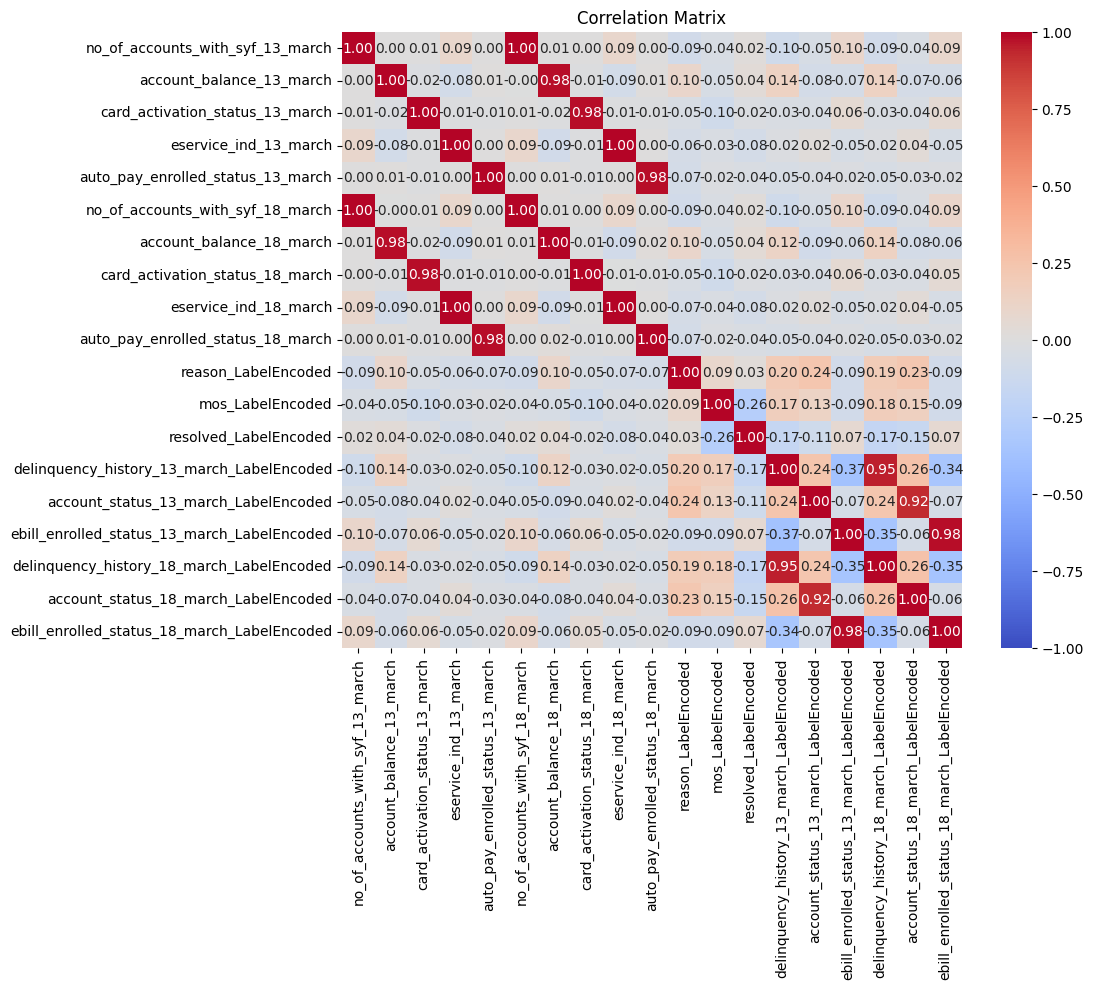

In [13]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding
df3.replace(' ', pd.NA, inplace=True)
df3.replace([20], pd.NA, inplace=True)
df3.replace([22], pd.NA, inplace=True)
df_cleaned = df3.dropna()
label_encoder = LabelEncoder()
column_to_encode = ['reason', 'mos', 'resolved', 'delinquency_history_13_march', 'account_status_13_march', 'ebill_enrolled_status_13_march', 'delinquency_history_18_march', 'account_status_18_march', 'ebill_enrolled_status_18_march']
for col in column_to_encode:
    df_cleaned[col + '_LabelEncoded'] = label_encoder.fit_transform(df_cleaned[col])

df_cleaned.drop(columns=column_to_encode, inplace=True)
print(df_cleaned)

import pickle

var_to_share = df_cleaned
with open('var_to_share.pkl', 'wb') as f:
    pickle.dump(var_to_share, f)

# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [149]:
mos = df3[['mos', 'reason', 'resolved']]
res = {}
lcode = {}

for i in range(100000):
    split_mos = mos.iloc[i]['mos'].strip().split(" ")
    # print(split_mos)
    for j in range(1, len(split_mos) + 1):
        currKey = "_".join(split_mos[0:j])
        # print(currKey)
        if (mos.iloc[i]['resolved'] == 'resolved'):
            res[currKey] = res.get(currKey, 0) + 1
        lcode[currKey] = lcode.get(currKey, 0) + 1

percentages = {}
resolved_codes_00 = set()
resolved_codes_05 = set()
rest_codes = set()
for k in res.keys():
    percentages[k] = res[k] / lcode[k]
    if percentages[k] == 1:
        resolved_codes_00.add(k)
    elif percentages[k] >= 0.95:
        resolved_codes_05.add(k)
    else:
        rest_codes.add(k)

print(len(percentages))
print(len(resolved_codes_00))
print(len(resolved_codes_05))
print(len(rest_codes))


6622
3987
49
2586


In [162]:
res_f = {}
lcode_f = {}

for i in range(100000):
    split_mos = mos.iloc[i]['mos'].strip().split(" ")
    # print(split_mos)
    for j in range(1, len(split_mos) + 1):
        currKey = "_".join(split_mos[0:j])
        # print(currKey)
        if (mos.iloc[i]['resolved'] == 'floor'):
            res_f[currKey] = res_f.get(currKey, 0) + 1
        lcode_f[currKey] = lcode_f.get(currKey, 0) + 1

percentages_f = {}
resolved_codes_00_f = set()
resolved_codes_05_f = set()
rest_codes_f = set()
for k in res_f.keys():
    percentages_f[k] = res_f[k] / lcode_f[k]
    if percentages_f[k] == 1:
        resolved_codes_00_f.add(k)
    elif percentages_f[k] >= 0.95:
        resolved_codes_05_f.add(k)
    else:
        rest_codes_f.add(k)

print(len(percentages_f))
print(len(resolved_codes_00_f))
print(len(resolved_codes_05_f))
print(len(rest_codes_f))

11444
8809
102
2533


In [163]:
resolved_codes_all_f = resolved_codes_00_f.union(resolved_codes_05_f)
print(len(resolved_codes_all_f))

8911


In [164]:
for k in resolved_codes_all_f:
    regCode = k.replace('_', ' ')
    resolved_codes_all_f.remove(k)
    resolved_codes_all_f.add(regCode) 

amt = 0.0
wrong_dir = 0.0
for i in range(1700000):
    if mos.iloc[i]['mos'] in resolved_codes_all_f:
        if mos.iloc[i]['resolved'] == 'resolved':
            wrong_dir += 1
        amt += 1

print(amt)
print(wrong_dir)
print(amt / 1700000.0)
print((wrong_dir / 1700000) / (amt / 1700000.0))

200052.0
9421.0
0.11767764705882353
0.0470927558834703


In [150]:
resolved_codes_all = resolved_codes_00.union(resolved_codes_05)
print(len(resolved_codes_all))

4036


In [154]:
for k in resolved_codes_all:
    regCode = k.replace('_', ' ')
    resolved_codes_all.remove(k)
    resolved_codes_all.add(regCode) 

amt = 0.0
wrong_dir = 0.0
for i in range(1700000):
    if mos.iloc[i]['mos'] in resolved_codes_all:
        if mos.iloc[i]['resolved'] == 'floor':
            wrong_dir += 1
        amt += 1

print(amt)
print(wrong_dir)
print(amt / 1700000.0)
print((wrong_dir / 1700000) / (amt / 1700000.0))

667395.0
31116.0
0.39258529411764703
0.04662306430224979


In [73]:
# STORAGE

codes_100 = resolved_codes.copy()

In [61]:
masks = []
for key in resolved_codes:
    masks.append((df3['mos'] == key))

comb_masks = masks[0]
for i in range(1, len(masks)):
    comb_masks |= masks[i]

df3_filtered = df3_filtered[~comb_masks]

print(df3_filtered.shape)

KeyboardInterrupt: 

In [86]:
a = "A B C D E F"
a = a.split(" ")

for i in range(len(a) - 1, -1, -1):
    print(a[i: len(a)])

['F']
['E', 'F']
['D', 'E', 'F']
['C', 'D', 'E', 'F']
['B', 'C', 'D', 'E', 'F']
['A', 'B', 'C', 'D', 'E', 'F']


In [71]:
df3_filtered2 = df3_filtered.copy()
for index, row in df3_filtered2.iterrows():
    if row['mos'] in resolved_codes:
        df3_filtered2.drop(index, inplace=True)

print(df3_filtered2.shape)

KeyboardInterrupt: 

In [70]:
for i, r in 

reason                                     PP
mos                                  IA PP TR
resolved                             resolved
no_of_accounts_with_syf_13_march          1.0
account_balance_13_march               872.02
delinquency_history_13_march             [00]
account_status_13_march                   NaN
card_activation_status_13_march             0
eservice_ind_13_march                       0
ebill_enrolled_status_13_march              L
auto_pay_enrolled_status_13_march           0
no_of_accounts_with_syf_18_march          1.0
account_balance_18_march               872.02
delinquency_history_18_march             [00]
account_status_18_march                   NaN
card_activation_status_18_march             0
eservice_ind_18_march                       0
ebill_enrolled_status_18_march              L
auto_pay_enrolled_status_18_march           0
Name: 32, dtype: object


In [ ]:
import pandas as pd
import featuretools as ft

# Define an entity in the EntitySet using the DataFrame
#es.entity_from_dataframe(entity_id='entity_name', dataframe=df, index='index_column')

import pickle

with open('var_to_share.pkl', 'rb') as f:
    var_to_share = pickle.load(f)

# Create an EntitySet and add the DataFrame as an entity
es = ft.EntitySet(id='Data_EntitySet')
num=1;
#import featuretools as ft
print(ft.__version__)

for col in var_to_share.columns:
    num = num + 1
    entity_name = num, "_Entity"
    es.entity_from_dataframe(entity_id='entity_name', dataframe=df3, index=col.name)

# Automatic feature engineering using deep feature synthesis (dfs)
features, feature_names = ft.dfs(entityset=es, target_entity='your_entity', max_depth=2)

# View the generated features
print(features.head())
print(feature_names)


1.30.0


AttributeError: 'EntitySet' object has no attribute 'entity_from_dataframe'

In [49]:
print(len(resolved_codes))


9830


<BarContainer object of 3366 artists>

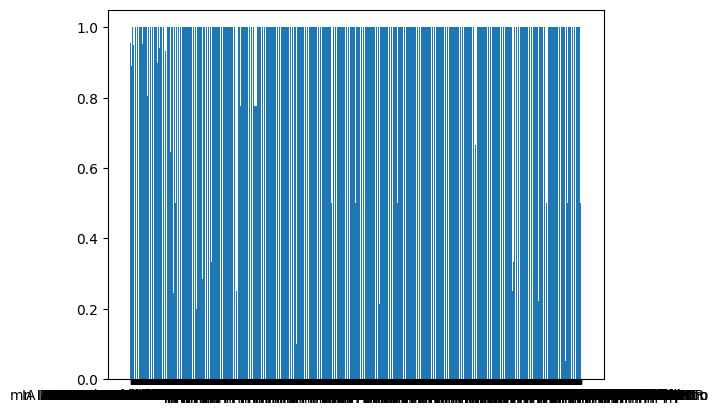

In [45]:
plt.bar(percentages.keys(), percentages.values())

In [165]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
X = dat[]  # Features

y = dat.target  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier()


dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

       reason                            mos  resolved  \
0          PP                       IA PP TR  resolved   
1          BA                 IA BA TS nl TR     floor   
2          PT           IA AA BA MR nl PT TR  resolved   
3          BA                          IA BA  resolved   
5          PS     IA BA TS nl PS nl mt RS TR     floor   
...       ...                            ...       ...   
894160     BA                    IA BA TA nl  resolved   
894161     BA                          IA BA  resolved   
894162     PP                       IA PP TR  resolved   
894163     FD                       IA IA TR     floor   
894164     LS  IA AA BA TS nl LS nl nl LS TR     floor   

        no_of_accounts_with_syf_13_march  account_balance_13_march  \
0                                    1.0                       NaN   
1                                    2.0                    143.28   
2                                   12.0                      0.00   
3                      

AttributeError: 'DataFrame' object has no attribute 'data'